In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv("D:\\Engineering\\BE\\SEM I\\uber.csv")

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df = df.drop(['Unnamed: 0','key'], axis=1)
df.dropna(axis=0, inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [8]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


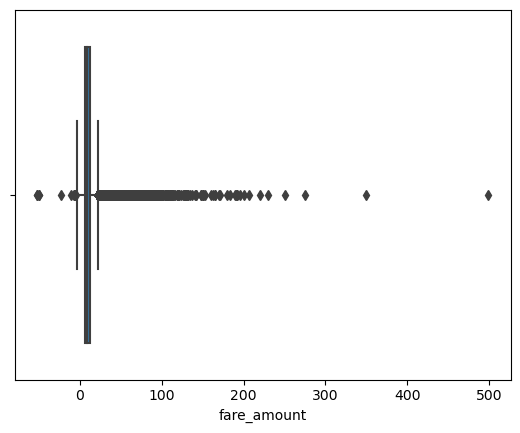

In [10]:
sns.boxplot(df["fare_amount"])
plt.show()

In [11]:
Q1 = df["fare_amount"].quantile(0.25)
Q3  = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q1 + 1.5 * IQR)
df2 = df[(df["fare_amount"] > lower_limit) & (df["fare_amount"] < upper_limit)]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


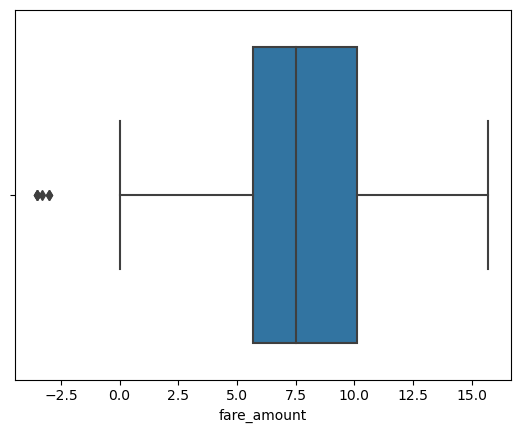

In [12]:
sns.boxplot(df2["fare_amount"])
plt.show()


In [13]:
def distance(lon1, lon2, lat1, lat2):
    lon1, lon2, lat1, lat2 = map(np.radians, [lon1, lon2, lat1, lat2])    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    R = 6371
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c  
    return distance

In [14]:
df["distance"] = distance(df["pickup_longitude"], df["dropoff_longitude"], df["pickup_latitude"], df["dropoff_latitude"])

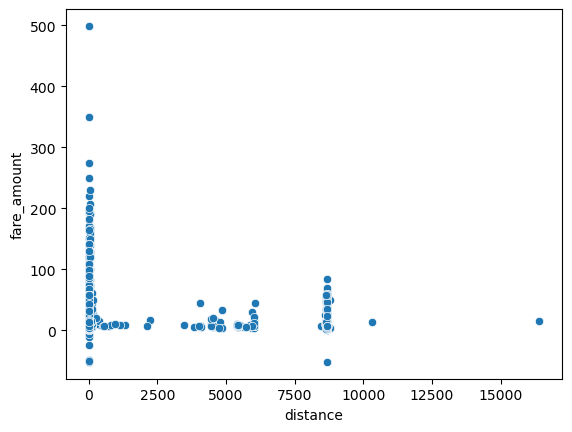

In [15]:
sns.scatterplot(x=df["distance"], y=df["fare_amount"])
plt.show()

In [16]:
df.drop(df[df['distance'] > 60].index, inplace = True)
df.drop(df[df['distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[(df['fare_amount'] > 10) & (df['distance'] < 1)].index, inplace = True )
df.drop(df[(df['fare_amount'] < 10) & (df['distance'] > 10)].index, inplace = True )


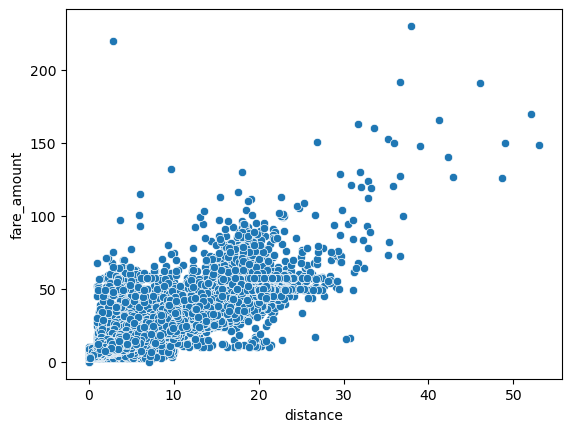

In [17]:
sns.scatterplot(x=df["distance"], y=df["fare_amount"])
plt.show()

In [18]:
x = df.drop("fare_amount", axis = 1)
x["pickup_datetime"] = pd.to_numeric(x["pickup_datetime"])

y = df["fare_amount"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [20]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predicted = lr_model.predict(x_test)
lr_rmse = np.sqrt(mean_squared_error(lr_predicted, y_test))
print("RMSE value for Linear regression is", lr_rmse)

RMSE value for Linear regression is 9.489646833042276


In [23]:
rfr_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
rfr_model.fit(x_train, y_train)
rfr_prediction = rfr_model.predict(x_test)
rfr_rmse = np.sqrt(mean_squared_error(rfr_prediction, y_test))
print("RMSE value for Random Forest is", rfr_rmse)

RMSE value for Random Forest is 3.144565334335407
